<a href="https://colab.research.google.com/github/zodplugin/PengolahanCitra/blob/main/M1_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Convert Image To RGB

In [1]:
import matplotlib.pyplot as plt
import numpy
import colorsys
import cv2
import pandas as pd
from PIL import Image
im = Image.open('muhehe.png').convert("RGB")
image = im.resize((250, 300))
pixels = list(image.getdata())

In [2]:
output = pd.DataFrame(pixels)
df = output.rename(columns={0: 'Red',1 : "Green", 2: "Blue"})
df

,Red,Green,Blue
0,232,85,94
1,231,84,93
2,232,85,94
3,232,85,94
4,233,86,95
...,...,...,...
74995,233,86,95
74996,232,85,94
74997,232,85,94
74998,232,85,94


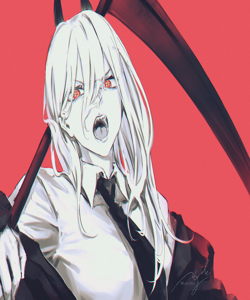

In [3]:
image

## 2. Show Histogram Value From Image

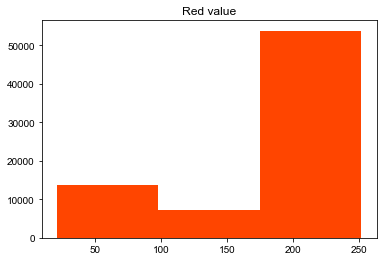

In [4]:
# Set title
plt.title("Red value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Red"], color = "orangered", bins=3)
plt.show()

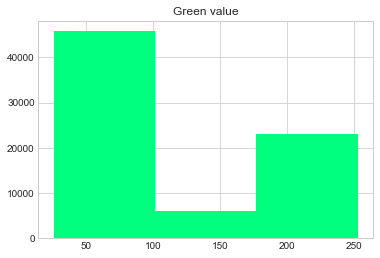

In [5]:
# Set title
plt.title("Green value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Green"], color="springgreen", bins=3)
plt.show()

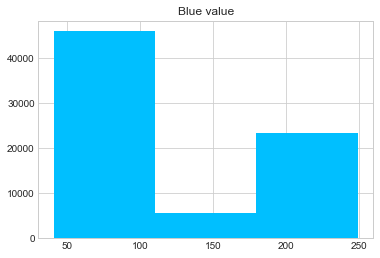

In [6]:
# Set title
plt.title("Blue value")
plt.style.use('seaborn-whitegrid')
plt.hist(df["Blue"], color="deepskyblue", bins=3)
plt.show()

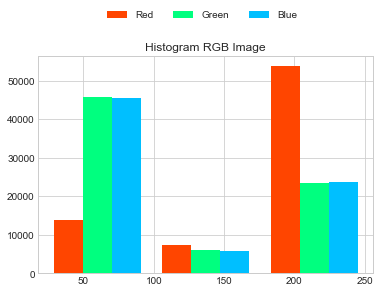

In [7]:
# Set title
plt.title("Histogram RGB Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df, color=["orangered", "springgreen", "deepskyblue"], bins=3, label=["Red","Green","Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


In [8]:
# Tampilkan nilai R , G , B
def get_value(list, value):
    for i in range(0, 256):
        temp = 0
        for j in list:
            if j == i:
                temp += 1
        value.append(temp)

In [9]:
def rgb_to_grayscale(width, height,pixel_map, image):
    for i in range(width):
        for j in range(height):

            # getting the RGB pixel value.
            r, g, b = image.getpixel((i, j))

            # Apply formula of grayscale:
            grayscale = (0.299*r + 0.587*g + 0.114*b)

            # setting the pixel value.
            pixel_map[i, j] = (int(grayscale), int(grayscale), int(grayscale))
    
    image.save("muhehe_grayscale.png", format="png")

In [10]:
im_grey = Image.open('muhehe.png').convert("RGB")

image_grey = im_grey.resize((250, 300))

# Extracting pixel map:
pixel_map = image_grey.load()

# Extracting the width and height
# of the image:
width, height = image_grey.size

rgb_to_grayscale(width, height, pixel_map, image_grey)

pixels_grey  = list(image_grey.getdata())

output_grey = pd.DataFrame(pixels_grey)
df_grey = output_grey.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_grey


,Red,Green,Blue
0,129,129,129
1,128,128,128
2,129,129,129
3,129,129,129
4,130,130,130
...,...,...,...
74995,130,130,130
74996,129,129,129
74997,129,129,129
74998,129,129,129


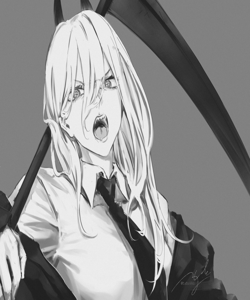

In [11]:
image_grey

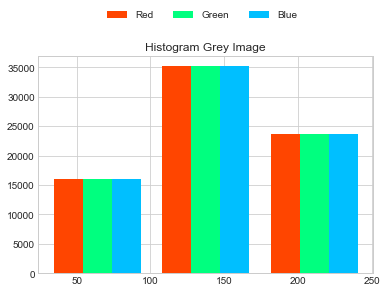

In [12]:
# Set title
plt.title("Histogram Grey Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df_grey, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


In [13]:
img = cv2.imread('muhehe.png')

img_1 = cv2.resize(img, (250, 300))

img_normalized = cv2.normalize(img_1, None, 0, 1.0,
                               cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Window name in which image is displayed
window_name = 'image'

# Using cv2.imshow() method
# Displaying the image
cv2.imshow(window_name, img_normalized)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)

# closing all open windows
cv2.destroyAllWindows()

In [14]:
list_1 = []

for i in img_normalized:
    for j in i:
        list_1.append(j)


output_norm = pd.DataFrame(list_1)
df_norm = output_norm.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_norm


,Red,Green,Blue
0,0.309735,0.269911,0.920354
1,0.336283,0.296460,0.946903
2,0.327434,0.287611,0.938053
3,0.327434,0.287611,0.938053
4,0.327434,0.287611,0.938053
...,...,...,...
74995,0.336283,0.296460,0.946903
74996,0.327434,0.287611,0.938053
74997,0.314159,0.274336,0.924779
74998,0.309735,0.269911,0.920354


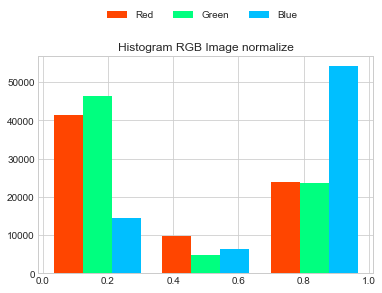

In [15]:
# Set title
plt.title("Histogram RGB Image normalize")
plt.style.use('seaborn-whitegrid')
plt.hist(df_norm, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

In [16]:
value_r = []
value_g = []
value_b = []

greyscale_r = []
greyscale_g = []
greyscale_b = []

value_r_norm = []
value_g_norm = []
value_b_norm = []

# RGB
# get value red
get_value(df["Red"], value_r)
# get value blue
get_value(df["Green"], value_g)
# get value red
get_value(df["Blue"], value_b)

# Grayscale
# get value red
get_value(df_grey["Red"], greyscale_r)
# get value blue
get_value(df_grey["Green"], greyscale_g)
# get value red
get_value(df_grey["Blue"], greyscale_b)

# Norm
get_value(df_norm["Red"], value_r_norm)
# get value blue
get_value(df_norm["Green"], value_g_norm)
# get value red
get_value(df_norm["Blue"], value_b_norm)

show_hist = pd.DataFrame()

show_hist.insert(0, "Red", value_r)

show_hist.insert(1, "Green", value_g)

show_hist.insert(2, "Blue", value_b)

show_hist.insert(3, "G. Red", greyscale_r)

show_hist.insert(4, "G. Green", greyscale_g)

show_hist.insert(5, "G. Blue", greyscale_b)

show_hist.insert(6, "Red Norm", value_r_norm)

show_hist.insert(7, "Green Norm", value_g_norm)

show_hist.insert(8, "Blue Norm", value_g_norm)

show_hist

,Red,Green,Blue,G. Red,G. Green,G. Blue,Red Norm,Green Norm,Blue Norm
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,5,5
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
251,0,0,0,0,0,0,0,0,0
252,1,1,0,0,0,0,0,0,0
253,0,1,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0


## 3. Convert RGB to HSL

In [17]:
def convert_rgb_to_hsl(width, height, pixel_map, image):
    for i in range(width):
        for j in range(height):
            
           # Getting the RGB pixel value.
            r, g, b = image.getpixel((i, j))

            # Normalize RGB values to the range [0, 1]
            r /= 255.0
            g /= 255.0
            b /= 255.0

            # Convert RGB to HSL
            h, l, s = colorsys.rgb_to_hls(r, g, b)

            # Scale HSL values to the range [0, 255]
            h = int(h * 255)
            s = int(s * 255)
            l = int(l * 255)

            # Setting the pixel value.
            pixel_map[i, j] = (h, l, s)

    image.save("muhehe_hsl.png", format="png")


In [18]:
im_hsl = Image.open('muhehe.png').convert("RGB")

image_hsl = im_hsl.resize((250, 300))

# Extracting pixel map:
pixel_map_hsl = image_hsl.load()

# Extracting the width and height
# of the image:
width, height = image_hsl.size

convert_rgb_to_hsl(width, height, pixel_map_hsl, image_hsl)

pixels_hsl = list(image_hsl.getdata())

output_hsl = pd.DataFrame(pixels_hsl)
df_hsl = output_hsl.rename(columns={0: 'Hue', 1: "Lightness", 2: "Saturation"})
df_hsl

,Hue,Lightness,Saturation
0,252,158,194
1,252,157,192
2,252,158,194
3,252,158,194
4,252,159,196
...,...,...,...
74995,252,159,196
74996,252,158,194
74997,252,158,194
74998,252,158,194


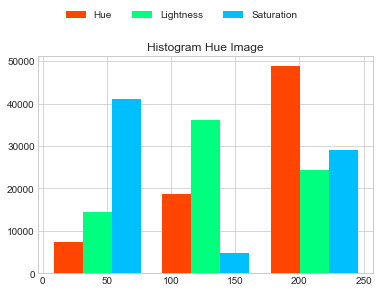

In [19]:
# Set title
plt.title("Histogram Hue Image")
plt.style.use('seaborn-whitegrid')
plt.hist(df_hsl, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Hue", "Lightness", "Saturation"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

## 4. Operasi pada citra

### Operasi And

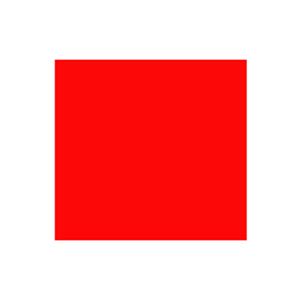

In [20]:
im_and = Image.open('a1.png').convert("RGB")
image_and = im_and.resize((300, 300))
pixels_and = list(image_and.getdata())
image_and

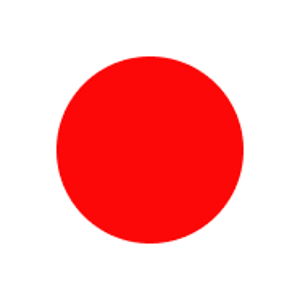

In [21]:
im_and_1 = Image.open('a2.png').convert("RGB")
image_and_1 = im_and_1.resize((300, 300))
pixels_and_1 = list(image_and_1.getdata())
image_and_1

In [22]:
def operation_and(width, height, pixel_map, image_1, image_2, image_result):
    for i in range(width):
        for j in range(height):

            # getting the RGB pixel value from image 1.
            r_1, g_1, b_1 = image_1.getpixel((i, j))
            
            # getting the RGB pixel value from image 2.
            r_2, g_2, b_2 = image_2.getpixel((i, j))
            
            r_result = r_1 & r_2
            g_result = g_1 & g_2
            b_result = b_1 & b_2

            # setting the pixel value.
            pixel_map[i, j] = (int(r_result), int(g_result), int(b_result))

    image_result.save("and.png", format="png")

In [23]:
# Extracting pixel map:
pixel_map_and = image_and.load()

pixel_map_and_1 = image_and_1.load()

# Extracting the width and height
# of the image:
width, height = image_and.size

result_image_and = Image.new("RGB", (width, height))

pixel_map_result_and = result_image_and.load()

operation_and(width, height, pixel_map_result_and, image_and, image_and_1, result_image_and)

pixels_and_result = list(result_image_and.getdata())

output_and = pd.DataFrame(pixels_and_result)
df_and = output_and.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_and

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


In [24]:
input_and = pd.DataFrame(pixels_and)
df_and_input = input_and.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_and_input

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


In [25]:
input_and_1 = pd.DataFrame(pixels_and_1)
df_and_input_1 = input_and_1.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})
df_and_input_1

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


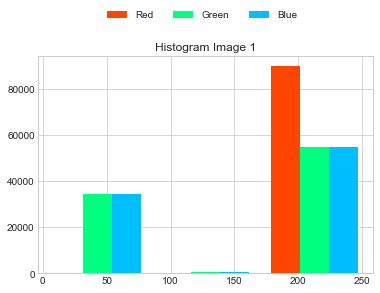

In [26]:
# Set title
plt.title("Histogram Image 1")
plt.style.use('seaborn-whitegrid')
plt.hist(df_and_input, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

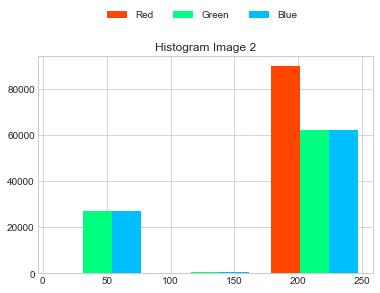

In [27]:
# Set title
plt.title("Histogram Image 2")
plt.style.use('seaborn-whitegrid')
plt.hist(df_and_input_1, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

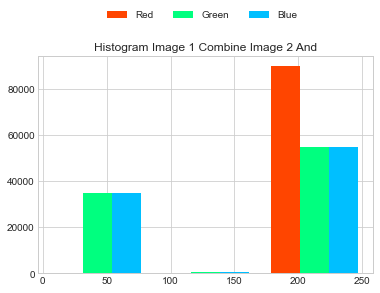

In [28]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 And")
plt.style.use('seaborn-whitegrid')
plt.hist(df_and, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

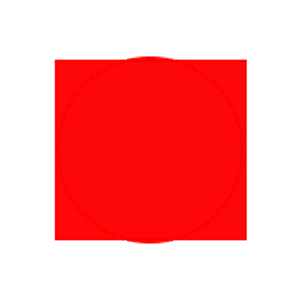

In [29]:
result_image_and

### Operasi Or

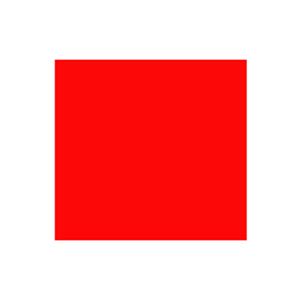

In [30]:
im_or = Image.open('a1.png').convert("RGB")
image_or = im_or.resize((300, 300))
pixels_or = list(image_or.getdata())
image_or 

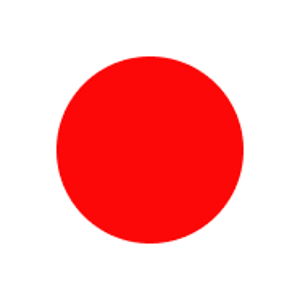

In [31]:
im_or_1 = Image.open('a2.png').convert("RGB")
image_or_1 = im_or_1.resize((300, 300))
pixels_or_1 = list(image_or_1.getdata())
image_or_1

In [32]:
def operation_or(width, height, pixel_map, image_1, image_2, image_result):
    for i in range(width):
        for j in range(height):

            # getting the RGB pixel value from image 1.
            r_1, g_1, b_1 = image_1.getpixel((i, j))

            # getting the RGB pixel value from image 2.
            r_2, g_2, b_2 = image_2.getpixel((i, j))

            r_result = r_1 | r_2
            g_result = g_1 | g_2
            b_result = b_1 | b_2

            # setting the pixel value.
            pixel_map[i, j] = (int(r_result), int(g_result), int(b_result))

    image_result.save("or.png", format="png")

In [33]:
# Extracting pixel map:
pixel_map_or = image_or.load()

pixel_map_or_1 = image_or_1.load()

# Extracting the width and height
# of the image:
width, height = image_or.size

result_image_or = Image.new("RGB", (width, height))

pixel_map_result_or = result_image_or.load()

operation_or(width, height, pixel_map_result_or,
              image_or, image_or_1, result_image_or)

pixels_or_result = list(result_image_or.getdata())

output_or = pd.DataFrame(pixels_or_result)

df_or = output_or.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_or

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


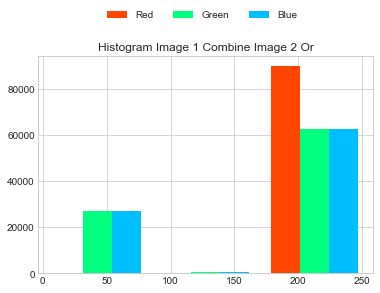

In [34]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 Or")
plt.style.use('seaborn-whitegrid')
plt.hist(df_or, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


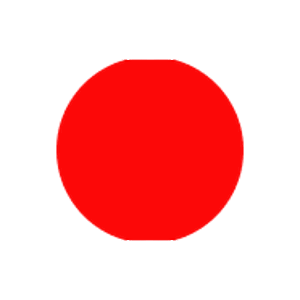

In [35]:
result_image_or

### Operasi XOR

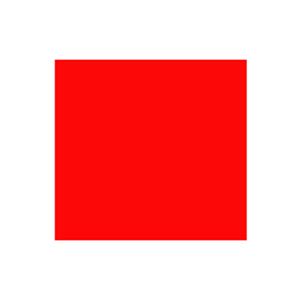

In [36]:
im_xor = Image.open('a1.png').convert("RGB")
image_xor = im_xor.resize((300, 300))
pixels_xor = list(image_xor.getdata())
image_xor

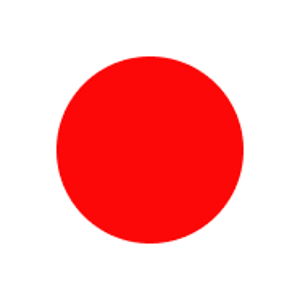

In [37]:
im_xor_1 = Image.open('a2.png').convert("RGB")
image_xor_1 = im_xor_1.resize((300, 300))
pixels_xor_1 = list(image_xor_1.getdata())
image_xor_1

In [38]:
def operation_xor(width, height, pixel_map, image_1, image_2, image_result):
    for i in range(width):
        for j in range(height):

            # getting the RGB pixel value from image 1.
            r_1, g_1, b_1 = image_1.getpixel((i, j))

            # getting the RGB pixel value from image 2.
            r_2, g_2, b_2 = image_2.getpixel((i, j))

            r_result = r_1 ^ r_2
            g_result = g_1 ^ g_2
            b_result = b_1 ^ b_2

            # setting the pixel value.
            pixel_map[i, j] = (int(r_result), int(g_result), int(b_result))

    image_result.save("xor.png", format="png")

In [39]:
# Extracting pixel map:
pixel_map_xor = image_xor.load()

pixel_map_xor_1 = image_xor_1.load()

# Extracting the width and height
# of the image:
width, height = image_xor.size

result_image_xor = Image.new("RGB", (width, height))

pixel_map_result_xor = result_image_xor.load()

operation_xor(width, height, pixel_map_result_xor,
             image_xor, image_xor_1, result_image_xor)

pixels_xor_result = list(result_image_xor.getdata())

output_xor = pd.DataFrame(pixels_xor_result)

df_xor = output_xor.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_xor

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
89995,0,0,0
89996,0,0,0
89997,0,0,0
89998,0,0,0


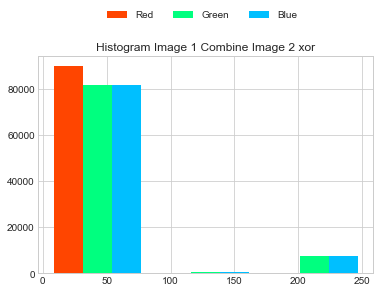

In [40]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 xor")
plt.style.use('seaborn-whitegrid')
plt.hist(df_xor, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi XNOR

In [41]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Invert the images (bitwise NOT)
image1_inverted = cv2.bitwise_xor(image1, image2)

# Perform bitwise OR operation on the inverted images
result = cv2.bitwise_not(image1_inverted)

# Save the XNOR result
cv2.imwrite('xnor.png', result)

True

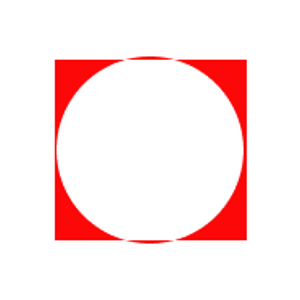

In [42]:
im_xnor = Image.open('xnor.png').convert("RGB")
image_xnor = im_xnor.resize((300, 300))
pixels_xnor = list(image_xnor.getdata())
image_xnor

In [43]:
output_xnor = pd.DataFrame(pixels_xnor)

df_xnor = output_xnor.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_xnor

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


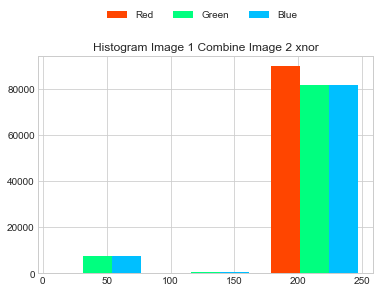

In [44]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 xnor")
plt.style.use('seaborn-whitegrid')
plt.hist(df_xnor, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()


### Operasi NAND

In [45]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Invert the images (bitwise NOT)
image1_inverted = cv2.bitwise_not(image1)
image2_inverted = cv2.bitwise_not(image2)

# Perform bitwise OR operation on the inverted images
result = cv2.bitwise_and(image1_inverted, image2_inverted)

# Save the XNOR result
cv2.imwrite('nand.png', result)

True

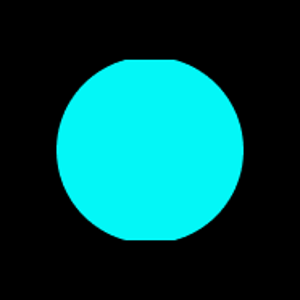

In [46]:
im_nand = Image.open('nand.png').convert("RGB")
image_nand = im_nand.resize((300, 300))
pixels_nand = list(image_nand.getdata())
image_nand

In [47]:
output_nand = pd.DataFrame(pixels_nand)

df_nand = output_nand.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_nand

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
89995,0,0,0
89996,0,0,0
89997,0,0,0
89998,0,0,0


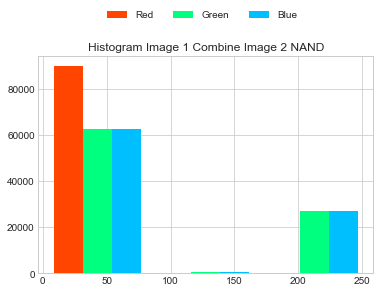

In [48]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 NAND")

plt.style.use('seaborn-whitegrid')
plt.hist(df_nand, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi NOR

In [49]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Invert the images (bitwise NOT)
image1_inverted = cv2.bitwise_not(image1)
image2_inverted = cv2.bitwise_not(image2)

# Perform bitwise OR operation on the inverted images
result = cv2.bitwise_or(image1_inverted, image2_inverted)

# Save the XNOR result
cv2.imwrite('nor.png', result)

True

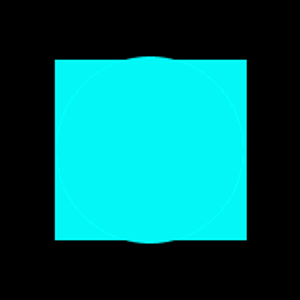

In [50]:
im_nor = Image.open('nor.png').convert("RGB")
image_nor = im_nor.resize((300, 300))
pixels_nor = list(image_nor.getdata())
image_nor

In [51]:
output_nor = pd.DataFrame(pixels_nor)

df_nor = output_nor.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_nor

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
89995,0,0,0
89996,0,0,0
89997,0,0,0
89998,0,0,0


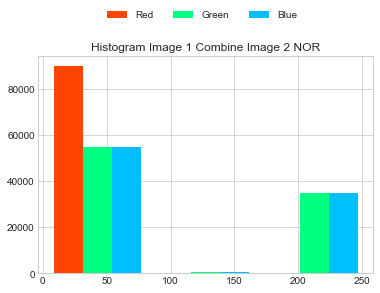

In [52]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 NOR")

plt.style.use('seaborn-whitegrid')
plt.hist(df_nor, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi +

In [53]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Perform bitwise add operation on the inverted images
result = cv2.add(image1 ,image2)

# Save the XNOR result
cv2.imwrite('add.png', result)

True

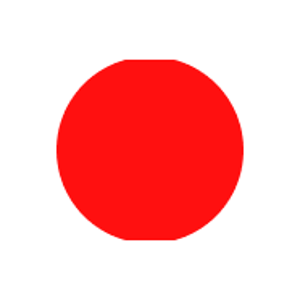

In [54]:
im_add = Image.open('add.png').convert("RGB")
image_add = im_add.resize((300, 300))
pixels_add = list(image_add.getdata())
image_add

In [55]:
output_add = pd.DataFrame(pixels_add)

df_add = output_add.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_add

,Red,Green,Blue
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
89995,255,255,255
89996,255,255,255
89997,255,255,255
89998,255,255,255


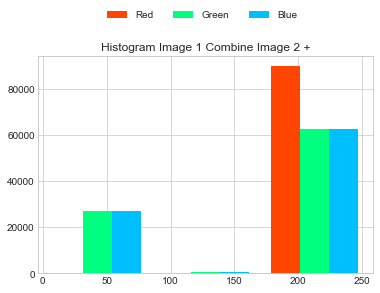

In [56]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 +")

plt.style.use('seaborn-whitegrid')
plt.hist(df_add, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi -

In [57]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Perform bitwise add operation on the inverted images
result = cv2.subtract(image1, image2)

# Save the XNOR result
cv2.imwrite('substract.png', result)

True

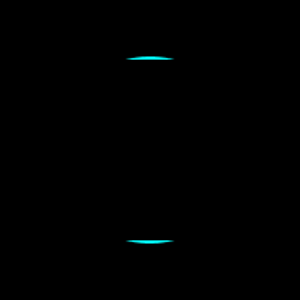

In [58]:
im_subs = Image.open('substract.png').convert("RGB")
image_subs = im_subs.resize((300, 300))
pixels_subs = list(image_subs.getdata())
image_subs

In [59]:
output_subs = pd.DataFrame(pixels_subs)

df_subs = output_subs.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_subs

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
89995,0,0,0
89996,0,0,0
89997,0,0,0
89998,0,0,0


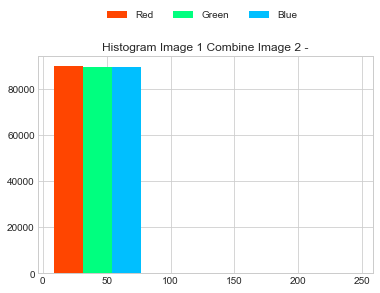

In [60]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 -")

plt.style.use('seaborn-whitegrid')
plt.hist(df_subs, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi *

In [61]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Perform bitwise add operation on the inverted images
result = cv2.multiply(image1, image2)

# Save the XNOR result
cv2.imwrite('mult.png', result)

True

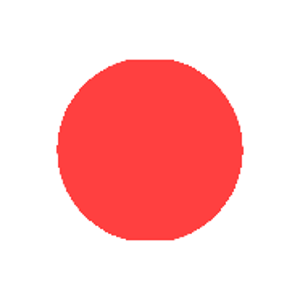

In [62]:
im_mult = Image.open('mult.png').convert("RGB")
image_mult = im_mult.resize((300, 300))
pixels_mult = list(image_mult.getdata())
image_mult

In [63]:
output_mult = pd.DataFrame(pixels_mult)

df_mult = output_subs.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_mult

,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
89995,0,0,0
89996,0,0,0
89997,0,0,0
89998,0,0,0


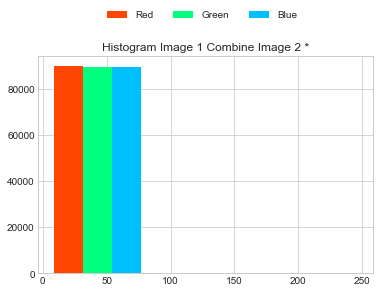

In [64]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 *")

plt.style.use('seaborn-whitegrid')
plt.hist(df_mult, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()

### Operasi /

In [65]:
import cv2

# Load the two input images
image1 = cv2.imread('a1.png')
image2 = cv2.imread('a2.png')

# Ensure that the images have the same dimensions
if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

# Perform pixel-wise division operation
result = cv2.divide(image1, image2)

# Save the division result
cv2.imwrite('divide.png', result)

True

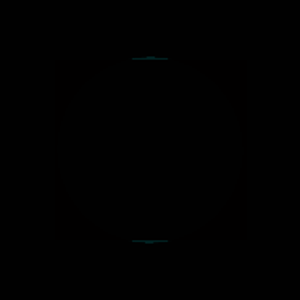

In [66]:
im_divide = Image.open('divide.png').convert("RGB")
image_divide = im_divide.resize((300, 300))
pixels_divide = list(image_divide.getdata())
image_divide

In [67]:
output_div = pd.DataFrame(pixels_divide)

df_div = output_div.rename(columns={0: 'Red', 1: "Green", 2: "Blue"})

df_div

,Red,Green,Blue
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
89995,1,1,1
89996,1,1,1
89997,1,1,1
89998,1,1,1


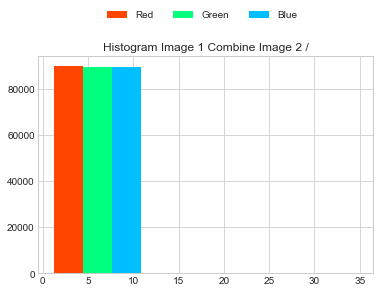

In [68]:
# Set title
plt.title("Histogram Image 1 Combine Image 2 /")

plt.style.use('seaborn-whitegrid')

plt.hist(df_div, color=["orangered", "springgreen", "deepskyblue"],
         bins=3, label=["Red", "Green", "Blue"])

plt.legend(bbox_to_anchor=(0.80, 1.25), ncol=3)

plt.show()